In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tensorflow.examples.tutorials.mnist import input_data

/home/ujjawal/project/env1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
MNIST = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
lr = .01 # the learning rate
batch_size = 128 # the number of examples we will consider per iterations
n_epochs = 2500 # the number of iterations we will do

In [5]:
# TODO: Create placeholders for X (our features) and Y (our labels)
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [6]:
# TODO: create Variables for w (our weights) and b (our biases)
w = tf.Variable(tf.truncated_normal(shape = [784, 10], stddev=0.01), name = 'w')
b = tf.Variable(tf.zeros([1, 10]), name = 'b')

In [7]:
logits = tf.matmul(X, w) + b

In [8]:
normalized_logits = tf.nn.softmax(logits)

In [9]:
# TODO: write code to compute the cross_entropy_loss and the mean_squared_loss.
# Experiment with both losses: which one performs better? Why might this be?
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits))
mean_squared_loss = tf.reduce_mean(tf.square(Y - normalized_logits))
loss = mean_squared_loss

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
# TODO: Create a GradientDescentOptimizer that minimizes our loss. 
opt = tf.train.GradientDescentOptimizer(learning_rate = lr).minimize(loss)

In [11]:
# operations that help us monitour our accuracy
cp = tf.equal(tf.argmax(logits, axis = 1), tf.argmax(Y, axis = 1))
acc= tf.reduce_mean(tf.cast(cp, tf.float32))


In [12]:
# TODO: create a global_variables_initializer, launch the graph, and run the optimization step for n_epochs iterations.
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
for i in range(n_epochs):
    batch = MNIST.train.next_batch(batch_size)
    sess.run(opt, feed_dict = {X: batch[0], Y: batch[1]})
    if i % 500 == 0:
        l = loss.eval(feed_dict = {X: batch[0], Y: batch[1]})
        print("Loss: {}".format(l))
a = acc.eval(feed_dict = {X: MNIST.test.images, Y: MNIST.test.labels})
print("test acc: {}".format(a))

Loss: 0.08995632082223892
Loss: 0.08774362504482269
Loss: 0.08516256511211395
Loss: 0.08176962286233902
Loss: 0.07943440228700638
test acc: 0.6502000093460083


In [13]:
import matplotlib.pyplot as plt

def plot_images(images):
    for i in range(images.shape[0]):
        plt.subplot(1, 5, i + 1) # Plotting 1 row of NUM_FIGURES.
        plt.axis('off')
        plt.imshow(images[i].reshape((28,28)), cmap = plt.cm.gray_r)
    plt.show()
    


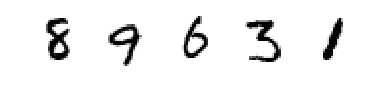

predicted 3, ground truth was 8
predicted 7, ground truth was 9
predicted 6, ground truth was 6
predicted 3, ground truth was 3
predicted 1, ground truth was 1


In [14]:
# TODO: Take some random images from the MNIST dataset, run a prediction, and display the prediction and the actual label.

NUM_IMAGES = 5
rand_image_idx = np.random.randint(0, MNIST.test.images.shape[1], NUM_IMAGES)
images, labels = [MNIST.test.images[i] for i in rand_image_idx], [MNIST.test.labels[i] for i in rand_image_idx]
images, labels = np.array(images), np.array(labels)
plot_images(images)
for i in range(images.shape[0]):
    prediction = sess.run(logits, feed_dict = {X: images[i].reshape((1, images[i].shape[0])), Y: labels[i].reshape((1, labels[i].shape[0]))})
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(labels[i])
    print("predicted {}, ground truth was {}".format(predicted_label, actual_label))